In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.3 MB/s eta 0:00:00
time: 564 µs (started: 2023-04-10 15:50:41 +00:00)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
np.set_printoptions(threshold=np.inf)

time: 413 ms (started: 2023-04-10 15:50:41 +00:00)


In [4]:
sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TRAINING_DATA.csv')

testData =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/synthetic data/SyntheticDataSD.csv')

time: 2.41 s (started: 2023-04-10 15:52:04 +00:00)


In [5]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]
X_test= testData.drop('Object_Held', axis=1)
y_test= testData[['Object_Held']]

time: 32 ms (started: 2023-04-10 15:52:07 +00:00)


In [6]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

time: 747 µs (started: 2023-04-10 15:52:07 +00:00)


In [7]:
X_train

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.010445,32.839093,0.796688,32.801138,0.672049,32.598748,0.322165,32.442574,0.086511,45.194791,...,0.453634,57.085112,1.541629,107.008139,0.148899,107.020952,-0.157546,107.005990,0.418681,26.483838
1,0.031048,26.828344,0.550354,26.793490,0.500228,26.617565,0.193967,26.995865,0.013110,59.185006,...,0.158144,16.654109,1.564327,102.981643,-0.051086,103.080865,-0.004866,103.175877,-0.007585,103.668021
2,0.038457,110.567765,0.808517,110.321907,0.440485,109.104348,0.101487,104.691031,0.051087,202.653217,...,0.639911,201.220968,1.496583,363.765022,0.211634,363.553092,-0.418162,362.442545,0.439608,357.595823
3,0.089646,144.278609,0.958439,143.564293,0.244826,140.548777,0.516424,141.254061,0.073867,251.329720,...,0.650024,208.518358,1.518549,456.370160,0.327488,456.375175,-0.392451,456.453786,0.621246,456.896505
4,0.018616,40.906474,0.646382,40.895683,0.411657,40.837607,0.288000,25.540176,0.015417,27.131941,...,0.307123,29.209126,1.543406,98.906924,0.115545,98.891234,0.009058,98.849936,0.095610,98.690772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,0.098011,131.484313,0.433704,127.478153,0.261010,124.598035,0.636805,133.302471,0.079848,136.269939,...,0.220674,11.973770,1.728794,1296.491574,-0.963922,1308.643326,0.411771,1305.174075,-0.268828,1247.196519
103996,-0.207267,29.689574,1.395837,29.627845,0.217758,29.296491,-0.342476,29.341589,0.047683,24.810969,...,0.067794,18.462487,1.564526,68.645733,-0.171600,68.572393,0.188174,68.784507,-0.114198,69.837109
103997,0.012985,9.170545,0.477758,9.073175,0.278467,8.546033,0.172794,8.245469,0.011595,9.970651,...,0.245780,40.719445,1.341691,43.103524,0.047159,43.059404,0.244886,42.996989,-0.000964,42.758392
103998,-0.000092,10.575114,0.756654,10.468608,0.784339,9.891076,0.227583,9.575672,0.000513,10.423315,...,0.289469,13.741549,1.617730,10.880924,0.001656,10.738996,0.085127,10.678098,0.203319,10.538928


time: 43.6 ms (started: 2023-04-10 15:52:07 +00:00)


In [8]:
X_train.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,...,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000
mean,0.010377,59.019077,0.757873,58.912398,0.439070,57.599880,0.105654,54.318285,0.017875,73.127612,...,0.343013,73.192579,1.538761,168.922281,0.097913,168.779236,-0.045654,168.651112,0.157913,151.315163
std,0.055551,46.583395,0.270122,46.528936,0.205687,42.997361,0.307863,39.434538,0.040321,104.034816,...,0.299632,72.030838,0.093073,152.145587,0.187873,151.753968,0.243162,151.604452,0.271902,149.612572
min,-0.245457,0.869717,0.150982,0.819148,-0.867079,1.449388,-0.878010,3.215971,-0.170895,3.086973,...,-0.589622,2.924713,0.346626,1.215740,-1.108879,1.435768,-0.493507,1.644472,-0.504787,2.091536
25%,0.001237,27.554567,0.576603,27.540487,0.311816,27.365424,-0.135092,25.684883,0.000031,23.781059,...,0.142518,19.096364,1.526144,66.929315,0.000537,66.907825,-0.292109,66.837465,-0.033042,53.333417
50%,0.014506,44.450103,0.694840,44.443107,0.443937,44.220685,0.168104,43.202844,0.011537,46.745350,...,0.313514,39.722224,1.548317,124.227595,0.099363,124.280676,-0.001013,124.143252,0.104243,93.046680
75%,0.030121,85.215340,0.848801,84.945624,0.597703,83.277963,0.321878,77.314024,0.026729,77.366670,...,0.499017,109.572627,1.588869,243.552500,0.199183,243.772409,0.077355,243.557953,0.353742,226.429805
max,0.302955,630.731861,1.710592,633.479712,1.243738,358.339848,1.044886,358.601367,0.263529,6920.296996,...,1.699928,826.251721,1.730182,2134.194766,1.425054,2137.999104,0.872015,2132.662026,1.820740,2124.201220


time: 305 ms (started: 2023-04-10 15:52:07 +00:00)


In [9]:
X_test

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.027615,69.092649,0.981353,69.161878,0.387295,69.357414,-0.242950,68.331466,-0.024021,169.370132,...,0.164227,165.712464,1.576836,342.909820,0.392210,342.550160,-0.297930,342.760607,0.279471,327.646991
1,0.023231,68.923894,1.045674,68.982427,0.317072,70.857961,-0.246476,69.874183,-0.023753,170.731099,...,0.145450,163.948582,1.598314,346.782820,0.406515,346.219878,-0.288880,345.874166,0.262677,316.012290
2,0.022121,65.657675,1.113918,65.589063,0.367334,65.357101,-0.243002,67.315493,-0.025509,162.066082,...,0.187942,175.821378,1.599231,339.710513,0.404678,339.507813,-0.369205,339.473803,0.279543,327.455117
3,0.024430,70.964609,1.049724,70.960389,0.369640,70.671458,-0.210844,70.946164,-0.022992,177.463892,...,0.172639,170.616193,1.565457,353.479062,0.404728,353.614175,-0.351883,353.595633,0.275242,352.823990
4,0.004493,69.586748,1.107282,69.568231,0.351800,70.225782,-0.253134,72.805058,-0.032460,197.747856,...,0.183053,184.587875,1.581320,363.797996,0.411384,363.129973,-0.340115,362.946896,0.265743,347.285078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,0.014993,28.882179,0.654770,28.843398,0.491522,29.006823,0.171364,29.532770,0.010697,20.694542,...,0.173920,24.024533,1.543555,71.282676,0.147048,71.210171,0.031296,71.068769,0.023732,67.777830
38996,0.017659,29.800373,0.644427,29.776154,0.489033,30.049606,0.174317,29.384608,0.011690,22.338828,...,0.176611,26.404046,1.539266,76.684425,0.154635,76.693862,0.029710,76.636081,0.029177,74.112211
38997,0.015716,27.778522,0.653107,27.750312,0.497106,28.465211,0.162863,28.994643,0.010423,21.520497,...,0.163790,25.903411,1.541661,71.005588,0.146429,71.109431,0.032746,71.078361,0.018378,69.968125
38998,0.015768,29.526614,0.655650,29.501306,0.483165,30.246088,0.167954,29.953669,0.010543,21.165328,...,0.169490,23.498937,1.542958,72.141144,0.151067,72.019424,0.035771,71.906223,0.022383,69.321969


time: 39.1 ms (started: 2023-04-10 15:52:08 +00:00)


In [10]:
X_test.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,...,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000
mean,0.012272,57.371754,0.749974,57.217809,0.446654,57.037360,0.098578,54.092491,0.015084,107.748296,...,0.339177,72.534849,1.534453,188.207487,0.118597,187.880229,-0.025941,187.398005,0.134806,165.331328
std,0.056286,45.080208,0.267028,44.990299,0.205763,42.977785,0.302477,38.943848,0.039163,215.836238,...,0.295537,69.883853,0.097298,166.640340,0.175313,166.091996,0.239926,165.759132,0.263648,165.827365
min,-0.234551,-5.022611,0.160449,-4.692118,-0.641956,-2.075338,-0.902034,-3.039853,-0.146213,13.120658,...,-0.447427,-23.071251,0.342965,-13.243001,-0.929516,-13.327592,-0.556956,-14.271073,-0.527730,-24.834891
25%,0.002871,25.235191,0.568667,25.114723,0.310219,25.827587,-0.140477,25.052817,-0.002503,45.321702,...,0.149063,21.174284,1.524499,78.510875,0.016540,78.439350,-0.266536,78.225024,-0.054485,64.405885
50%,0.016151,43.449441,0.687470,43.399337,0.444060,43.778809,0.165471,43.407771,0.011035,69.623424,...,0.318799,41.134856,1.547226,137.160599,0.121758,137.135942,0.011944,136.774997,0.095420,102.354897
75%,0.032159,81.863109,0.842822,81.504258,0.609337,80.936997,0.302609,74.798527,0.024896,108.675340,...,0.485703,109.389089,1.585742,255.374598,0.220041,255.234095,0.092678,254.917106,0.311563,228.991206
max,0.282790,408.723202,1.699974,406.860601,1.269179,273.471660,0.891884,241.266663,0.233826,6914.921297,...,1.302712,553.770277,1.677256,1092.666218,1.116314,1091.039707,0.950453,1096.011173,0.917038,1114.133899


time: 131 ms (started: 2023-04-10 15:52:08 +00:00)


time: 740 ms (started: 2023-04-10 15:52:08 +00:00)


## Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


time: 858 ms (started: 2023-04-10 15:52:09 +00:00)


In [12]:
X_test = scalar.transform(X_test)
X_test= pd.DataFrame(X_test)

time: 17.6 ms (started: 2023-04-10 15:52:09 +00:00)


In [13]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


time: 271 ms (started: 2023-04-10 15:52:09 +00:00)


In [14]:
scalar.get_params(deep=True)

{'copy': True, 'with_mean': True, 'with_std': True}

time: 3.81 ms (started: 2023-04-10 15:52:10 +00:00)


## PCA

In [15]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
pca = PCA()
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 546 ms (started: 2023-04-10 15:52:15 +00:00)


In [16]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.079153,-1.511967,-0.147611,-1.440011,2.447635,-1.517295,-0.599317,0.213785,0.495297,0.316445,...,-0.185365,-0.041427,-0.100992,0.029031,0.014606,-0.005046,-0.003763,-0.001029,-0.000131,-0.000369
1,-2.335855,0.529823,1.124112,-0.231441,0.964326,0.751084,0.085443,0.246855,-0.645806,0.778531,...,0.117310,0.035554,-0.050744,-0.003392,0.004297,0.002875,-0.000377,0.000921,0.000664,0.000427
2,6.315912,0.068412,-0.764194,-0.375139,0.283259,0.074741,1.046318,0.139936,-0.177715,0.539767,...,-0.239816,-0.142043,0.032734,0.021822,-0.010794,0.013894,0.009768,-0.001362,-0.001821,0.000507
3,8.337553,0.772039,-0.932769,-0.882899,0.961646,-0.680245,1.483954,-0.063228,-0.418476,-0.814917,...,0.243631,-0.240756,-0.205072,0.005178,0.036575,0.000069,-0.001787,0.002680,-0.000716,0.001477
4,-2.121760,-0.276020,1.309656,-0.046424,-0.135378,-0.300503,0.180755,-0.229964,0.006841,-1.015633,...,0.074286,-0.051673,0.111019,0.158353,-0.006944,0.001373,0.001427,-0.000060,-0.000445,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,7.355313,7.748587,3.898466,3.652079,2.192688,-1.013384,-2.024073,-2.256681,1.305626,-1.298719,...,-0.108290,0.894026,-0.496291,0.081719,0.155602,0.004648,0.035781,0.048060,0.018093,0.012240
103996,-3.050823,1.152167,-5.042848,1.808441,2.490603,-2.571199,-3.913538,0.781833,1.321337,-0.894561,...,-0.833411,-0.056973,-0.063156,-0.106740,0.014465,-0.001823,0.005684,0.000123,-0.000997,0.000038
103997,-3.059180,-0.598988,2.118689,1.422867,-1.218486,-1.225421,-0.163778,1.030046,-1.165390,-0.146623,...,0.011780,0.039457,-0.006971,0.007833,0.002428,0.002168,0.001858,0.001403,0.000625,-0.000341
103998,-4.010651,-1.380656,1.472554,-0.169433,1.013548,0.770224,0.177408,-1.357306,0.502398,0.022778,...,-0.034796,-0.038155,-0.005727,0.018365,0.005892,0.000914,0.000365,0.000157,0.000053,0.000254


time: 47 ms (started: 2023-04-10 15:52:15 +00:00)


In [17]:
pca.explained_variance_ratio_.shape, pca.explained_variance_ratio_

((32,),
 array([3.93635227e-01, 1.24762053e-01, 1.18611084e-01, 6.33569133e-02,
        5.18495059e-02, 4.61874288e-02, 3.12795119e-02, 3.08574023e-02,
        2.30650019e-02, 2.13228593e-02, 1.73227197e-02, 1.57880285e-02,
        1.25994637e-02, 1.23241753e-02, 9.69130640e-03, 5.75195889e-03,
        4.65616072e-03, 3.94373278e-03, 3.49445094e-03, 2.55820622e-03,
        1.86431397e-03, 1.76654672e-03, 1.13938699e-03, 9.62450594e-04,
        5.78276561e-04, 4.54243339e-04, 1.41609487e-04, 2.77623479e-05,
        7.41302858e-06, 5.54999185e-07, 1.44969877e-07, 1.06373264e-07]))

time: 5.1 ms (started: 2023-04-10 15:52:15 +00:00)


In [18]:
Principal_Components = pca.components_

time: 1.67 ms (started: 2023-04-10 15:52:15 +00:00)


In [19]:
PC = pd.DataFrame(Principal_Components)

time: 951 µs (started: 2023-04-10 15:52:15 +00:00)


In [20]:
PC

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.038970,0.227480,-0.041183,0.227089,-0.029853,0.234044,0.085140,0.212645,0.074480,0.203332,...,0.132899,0.232995,-0.075767,0.257810,0.084774,0.257755,-0.163750,0.257647,0.164985,0.236093
1,0.210631,0.167665,0.049530,0.168438,-0.255426,0.173537,-0.285588,0.157379,0.106942,0.145179,...,-0.362897,-0.205505,0.068793,0.078911,-0.157337,0.079763,0.189417,0.080286,-0.308056,0.146001
2,0.215840,-0.022997,-0.447352,-0.022945,0.189035,-0.025985,0.147609,-0.069949,0.104971,0.095936,...,-0.010958,-0.059836,-0.219659,0.050433,0.034222,0.050625,0.136032,0.050874,0.002412,0.071645
3,-0.343782,-0.196815,0.091716,-0.197243,-0.134389,-0.182356,-0.010766,-0.245331,-0.328904,0.194889,...,-0.070943,0.077635,-0.286906,0.144803,-0.216314,0.143241,0.328442,0.143811,-0.115993,0.148792
4,-0.049038,-0.112671,0.157058,-0.113736,0.252193,-0.108783,0.343865,-0.129959,0.175216,0.252527,...,-0.028182,-0.144273,0.043198,0.027855,-0.086438,0.028059,-0.011676,0.028132,0.158536,0.031766
5,-0.262493,0.052712,-0.012035,0.052313,0.180420,0.059725,-0.036480,0.149267,-0.595084,0.089757,...,-0.012658,-0.093856,0.235831,0.001311,0.110527,0.000336,-0.018347,0.000533,0.015452,-0.019695
6,0.439472,-0.179670,0.129346,-0.180812,-0.038874,-0.182265,0.151128,-0.157223,0.109244,0.141276,...,-0.005929,0.035417,0.169075,-0.030346,0.316440,-0.029523,-0.121843,-0.031364,-0.060547,0.005546
7,-0.044409,-0.206277,-0.174263,-0.206630,-0.233178,-0.152483,-0.047578,-0.098967,-0.015606,-0.024514,...,-0.061544,-0.099352,-0.291184,0.084291,0.494473,0.086794,-0.073178,0.087764,-0.117008,0.133274
8,-0.118315,-0.020375,0.064558,-0.020455,0.454334,-0.006347,-0.339228,-0.003971,0.020924,-0.010323,...,-0.041618,0.024945,0.270979,0.129821,0.516203,0.130477,0.048765,0.128860,-0.178937,0.137469
9,0.262415,-0.072005,-0.027722,-0.071177,0.441679,-0.057777,-0.353237,-0.077891,0.148581,0.032304,...,-0.023879,0.151602,-0.186911,-0.031865,-0.264087,-0.029048,0.160592,-0.027188,-0.180036,0.017587


time: 92.5 ms (started: 2023-04-10 15:53:11 +00:00)


In [21]:
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

time: 4.09 ms (started: 2023-04-10 15:53:12 +00:00)


In [22]:
X_trainPCA = principalDf

time: 994 µs (started: 2023-04-10 15:53:12 +00:00)


In [23]:
X_trainPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.079153,-1.511967,-0.147611,-1.440011,2.447635,-1.517295,-0.599317,0.213785,0.495297,0.316445,...,-0.185365,-0.041427,-0.100992,0.029031,0.014606,-0.005046,-0.003763,-0.001029,-0.000131,-0.000369
1,-2.335855,0.529823,1.124112,-0.231441,0.964326,0.751084,0.085443,0.246855,-0.645806,0.778531,...,0.117310,0.035554,-0.050744,-0.003392,0.004297,0.002875,-0.000377,0.000921,0.000664,0.000427
2,6.315912,0.068412,-0.764194,-0.375139,0.283259,0.074741,1.046318,0.139936,-0.177715,0.539767,...,-0.239816,-0.142043,0.032734,0.021822,-0.010794,0.013894,0.009768,-0.001362,-0.001821,0.000507
3,8.337553,0.772039,-0.932769,-0.882899,0.961646,-0.680245,1.483954,-0.063228,-0.418476,-0.814917,...,0.243631,-0.240756,-0.205072,0.005178,0.036575,0.000069,-0.001787,0.002680,-0.000716,0.001477
4,-2.121760,-0.276020,1.309656,-0.046424,-0.135378,-0.300503,0.180755,-0.229964,0.006841,-1.015633,...,0.074286,-0.051673,0.111019,0.158353,-0.006944,0.001373,0.001427,-0.000060,-0.000445,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,7.355313,7.748587,3.898466,3.652079,2.192688,-1.013384,-2.024073,-2.256681,1.305626,-1.298719,...,-0.108290,0.894026,-0.496291,0.081719,0.155602,0.004648,0.035781,0.048060,0.018093,0.012240
103996,-3.050823,1.152167,-5.042848,1.808441,2.490603,-2.571199,-3.913538,0.781833,1.321337,-0.894561,...,-0.833411,-0.056973,-0.063156,-0.106740,0.014465,-0.001823,0.005684,0.000123,-0.000997,0.000038
103997,-3.059180,-0.598988,2.118689,1.422867,-1.218486,-1.225421,-0.163778,1.030046,-1.165390,-0.146623,...,0.011780,0.039457,-0.006971,0.007833,0.002428,0.002168,0.001858,0.001403,0.000625,-0.000341
103998,-4.010651,-1.380656,1.472554,-0.169433,1.013548,0.770224,0.177408,-1.357306,0.502398,0.022778,...,-0.034796,-0.038155,-0.005727,0.018365,0.005892,0.000914,0.000365,0.000157,0.000053,0.000254


time: 39.2 ms (started: 2023-04-10 15:53:12 +00:00)


In [24]:
pc = pca.transform(X_test)
X_testPCA = pd.DataFrame(data = pc, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 24.4 ms (started: 2023-04-10 15:53:12 +00:00)


In [25]:
X_testPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,3.851418,0.405099,-1.546955,0.775866,-0.769421,1.151639,1.666887,1.245232,0.971783,0.394944,...,0.532395,-0.008584,-0.019563,-0.333178,-0.010228,0.012760,-0.001885,-0.003750,0.002541,-0.000053
1,3.838512,0.508443,-1.938835,0.819601,-0.795745,1.082608,1.662003,1.280898,0.997820,0.252183,...,0.546498,-0.007890,-0.014071,-0.389461,-0.004388,0.011103,-0.002303,-0.003780,0.002288,0.000086
2,3.905683,0.104971,-2.416773,0.773507,-0.728779,1.000351,1.856619,1.261843,1.052518,0.358252,...,0.574945,0.003039,-0.035081,-0.382708,-0.008819,0.014622,-0.001207,-0.002405,0.002556,0.000124
3,4.184680,0.265206,-1.814877,0.863111,-0.668338,0.988462,1.655586,1.310003,0.985986,0.325679,...,0.557976,0.011717,-0.027350,-0.409446,-0.008512,0.010390,-0.001541,-0.003751,0.002279,-0.000209
4,4.461778,0.166343,-2.286271,1.286195,-0.705179,1.119052,1.644381,1.221324,1.192999,0.289280,...,0.536380,-0.001712,-0.032214,-0.380453,-0.006122,0.011680,-0.002359,-0.003718,0.002540,-0.000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,-2.695107,-0.301568,1.056292,-0.248672,-0.008590,0.261012,0.101774,0.259745,0.128739,-0.092966,...,-0.026383,-0.010288,-0.008900,0.124845,-0.003009,0.000795,-0.001057,-0.000584,-0.000117,0.000163
38996,-2.580640,-0.311519,1.123539,-0.260318,-0.022344,0.236571,0.104553,0.305866,0.125636,-0.069317,...,-0.005739,-0.016047,-0.003636,0.129176,-0.003768,0.000742,-0.001152,-0.000764,-0.000150,0.000132
38997,-2.699438,-0.310414,1.032300,-0.236346,-0.009794,0.270291,0.100474,0.309905,0.130006,0.003699,...,-0.015598,-0.017392,-0.007080,0.124773,-0.003715,0.000882,-0.001003,-0.000654,-0.000125,0.000163
38998,-2.677973,-0.255586,1.057930,-0.252479,-0.033390,0.268588,0.104226,0.278573,0.120754,-0.107921,...,-0.021165,-0.018520,0.002262,0.126397,-0.003335,0.001108,-0.001139,-0.000705,-0.000111,0.000119


time: 48.7 ms (started: 2023-04-10 15:53:12 +00:00)


time: 63.8 ms (started: 2023-04-10 15:53:12 +00:00)


In [26]:
X_trainPCA=X_trainPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]
X_testPCA=X_testPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]

time: 12.1 ms (started: 2023-04-10 15:53:12 +00:00)


time: 33.2 ms (started: 2023-04-10 15:53:12 +00:00)


## SVM

In [27]:
from sklearn import svm
clf = svm.SVC(decision_function_shape = 'ovr', gamma = 'auto', C=5)
clf.fit(X_trainPCA, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, gamma='auto')

time: 12 s (started: 2023-04-10 15:53:12 +00:00)


In [28]:
y_1= clf.predict(X_testPCA)

time: 13.1 s (started: 2023-04-10 15:53:24 +00:00)


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_1)

0.9553846153846154

time: 47.1 ms (started: 2023-04-10 15:53:37 +00:00)


In [30]:
clf.get_params()

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

time: 6.87 ms (started: 2023-04-10 15:53:37 +00:00)


time: 14.8 ms (started: 2023-04-10 15:53:37 +00:00)


In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_1)

time: 147 ms (started: 2023-04-10 15:53:37 +00:00)


In [32]:
cm= pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3000,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2144,14,0,0,0,0,0,0,841,1,0,0
2,0,0,2965,0,0,0,0,0,25,6,4,0,0
3,9,0,30,2836,0,0,6,0,15,96,8,0,0
4,0,0,0,3,2997,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3000,0,0,0,0,0,0,0
6,0,0,0,0,0,0,3000,0,0,0,0,0,0
7,0,0,0,0,0,0,0,3000,0,0,0,0,0
8,0,0,0,0,0,0,0,0,3000,0,0,0,0
9,0,0,0,0,0,0,0,0,10,2990,0,0,0


time: 12.2 ms (started: 2023-04-10 15:53:37 +00:00)


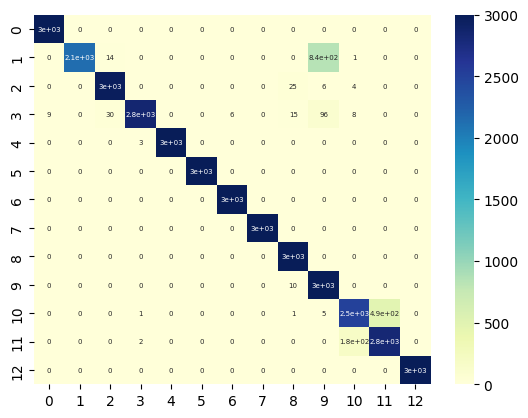

time: 882 ms (started: 2023-04-10 15:53:37 +00:00)


In [33]:
import seaborn as sb

dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 5})

plt.show()

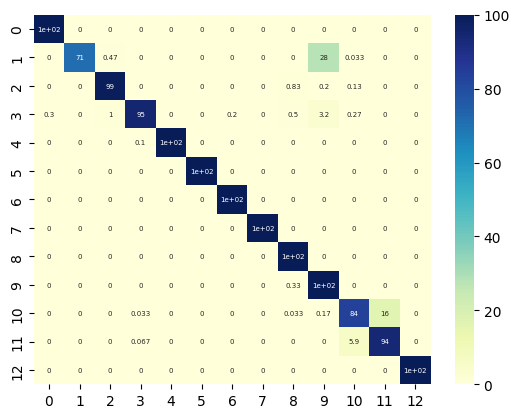

time: 593 ms (started: 2023-04-10 15:53:38 +00:00)


In [34]:
for i in range(13):
  a=cm.iloc[i].sum()
  cm.iloc[i]= (cm.iloc[i]/a)*100

import seaborn as sb

dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 5})

plt.show()

In [35]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_1, average='macro'),"\n")

print(precision_recall_fscore_support(y_test, y_1, average='micro'),"\n")

print(precision_recall_fscore_support(y_test, y_1, average='weighted'), "\n")

(0.9618017055740862, 0.9553846153846154, 0.9551164924283936, None) 

(0.9553846153846154, 0.9553846153846154, 0.9553846153846153, None) 

(0.9618017055740862, 0.9553846153846154, 0.9551164924283936, None) 

time: 815 ms (started: 2023-04-10 15:53:39 +00:00)


time: 823 ms (started: 2023-04-10 15:53:39 +00:00)
